In [1]:
import datetime
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt

In [2]:
start = datetime.datetime(2005, 1, 1)
end = datetime.datetime(2020, 1, 1)
tickers = ['EWA','EWZ','EWC','FXI', 'EWQ', 'EWG', 'EWH', 'EWI', 'EWJ', 'EWY', 'EWN', 'EWS', 'EZA', 'EWP', 'EWD', 'EWL', 'EWT', 'EWU', 'IVV']

all_data = {}
for ticker in tickers:
    all_data[ticker] = pdr.get_data_yahoo(ticker, start, end)
        
Data = DataFrame({tic: data['Adj Close'] for tic, data in all_data.items()})

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

### 技術指標：乖離率(取30日)

In [3]:
bias_30_list = []

for tic in tickers:
    bias_30_pct = ((Data[tic] - Data[tic].rolling(30, min_periods = 1).mean()) / Data[tic].rolling(30, min_periods = 1).mean())*100
    bias_30_list.append(pd.Series(bias_30_pct.values, index = bias_30_pct.index))

# numbers in percentage
bias_frame = pd.DataFrame(bias_30_list).transpose()
bias_frame.columns = tickers
bias_frame = bias_frame.asfreq('BM')

In [4]:
bias_frame

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2004-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005-01-31,2.206483,3.328241,-0.370906,2.140132,0.864176,-0.790490,0.144869,0.746441,-0.758648,5.288984,2.081796,1.429138,0.495927,1.827600,-1.734483,-0.281017,2.549445,0.381875,-0.062360
2005-02-28,3.994062,11.359616,4.218073,5.732356,4.256386,2.712305,2.787581,2.355571,1.779485,8.906925,5.093140,-0.204242,7.785654,2.507721,3.947192,5.116470,4.984809,3.180204,1.195642
2005-03-31,-3.854875,-4.183714,0.637074,-2.643123,-1.556593,-1.582215,-1.663159,0.496185,-2.620912,-3.984308,-2.536264,-2.592168,-5.710596,-2.765372,-2.687448,-2.470502,-3.344293,-1.863834,-1.274925
2005-04-29,-0.978042,-2.723191,-3.316972,0.957500,-2.949833,-2.985204,3.335917,-3.457068,-1.622011,-3.305704,-3.423022,-0.296728,-1.736377,-2.368998,-2.468656,-1.123555,-0.271873,-1.155306,-0.833435
2005-05-31,0.263390,4.843329,1.461219,0.003655,0.349662,0.670375,0.898749,-1.693725,-0.764879,2.268024,-0.882408,-0.289018,-4.428262,-1.227785,0.117738,-0.387165,2.325716,-1.078102,1.896656
2005-06-30,1.502282,3.665733,2.766865,3.253792,0.444254,-0.340819,2.492187,0.347650,-0.594729,-1.670571,1.635918,0.897453,1.938253,0.721689,-0.771249,-1.138107,0.110315,-0.066736,-0.659146
2005-07-29,1.514350,2.176148,2.663233,6.420993,3.221146,4.298967,4.066321,2.734514,0.231454,7.012247,1.183218,5.011021,4.968774,2.944286,2.966885,3.282883,-0.782961,0.482997,1.667183
2005-08-31,0.697084,6.080067,3.570839,-1.283431,0.224728,0.540031,-1.040629,0.834467,4.239467,-2.136630,0.428889,-2.668428,3.493418,0.217513,0.304939,0.590278,-3.948349,1.656459,-0.298674


### 技術指標：KD值

In [5]:
EWA = pdr.get_data_yahoo('EWA', start, end)
EWZ = pdr.get_data_yahoo('EWZ', start, end)
EWC = pdr.get_data_yahoo('EWC', start, end)
FXI = pdr.get_data_yahoo('FXI', start, end)
EWQ = pdr.get_data_yahoo('EWQ', start, end)
EWG = pdr.get_data_yahoo('EWG', start, end)
EWH = pdr.get_data_yahoo('EWH', start, end)
EWI = pdr.get_data_yahoo('EWI', start, end)
EWJ = pdr.get_data_yahoo('EWJ', start, end)
EWY = pdr.get_data_yahoo('EWY', start, end)
EWN = pdr.get_data_yahoo('EWN', start, end)
EWS = pdr.get_data_yahoo('EWS', start, end)
EZA = pdr.get_data_yahoo('EZA', start, end)
EWP = pdr.get_data_yahoo('EWP', start, end)
EWD = pdr.get_data_yahoo('EWD', start, end)
EWL = pdr.get_data_yahoo('EWL', start, end)
EWT = pdr.get_data_yahoo('EWT', start, end)
EWU = pdr.get_data_yahoo('EWU', start, end)
IVV = pdr.get_data_yahoo('IVV', start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [6]:
EWA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-12-31,16.660000,16.740000,16.570000,16.700001,8.332647,675000
2005-01-03,16.620001,16.660000,16.469999,16.469999,8.217886,449800
2005-01-04,16.580000,16.590000,16.120001,16.180000,8.073186,932300
2005-01-05,16.200001,16.320000,16.200001,16.240000,8.103125,1151600
2005-01-06,16.299999,16.299999,16.129999,16.270000,8.118093,140900


In [7]:
import talib

In [8]:
def training_period_data(ETF):
    return ETF.loc[:datetime.datetime(2012, 12, 31), 'High':'Close']

# 參數指標9日，平滑值3
def kd(training_period_data):
    kd = talib.STOCH(training_period_data['High'].ffill().values, 
                 training_period_data['Low'].ffill().values, 
                 training_period_data['Close'].ffill().values,
                 fastk_period=9, slowk_period=3
                 , slowd_period=3, slowk_matype=1, slowd_matype=1)
    k = pd.Series(kd[0], index=training_period_data.index)
    return k

In [9]:
kd_EWA = kd(training_period_data(EWA))
kd_EWZ = kd(training_period_data(EWZ))
kd_EWC = kd(training_period_data(EWC))
kd_FXI = kd(training_period_data(FXI))
kd_EWQ = kd(training_period_data(EWQ))
kd_EWG = kd(training_period_data(EWG))
kd_EWH = kd(training_period_data(EWH))
kd_EWI = kd(training_period_data(EWI))
kd_EWJ = kd(training_period_data(EWJ))
kd_EWY = kd(training_period_data(EWY))
kd_EWN = kd(training_period_data(EWN))
kd_EWS = kd(training_period_data(EWS))
kd_EZA = kd(training_period_data(EZA))
kd_EWP = kd(training_period_data(EWP))
kd_EWD = kd(training_period_data(EWD))
kd_EWL = kd(training_period_data(EWL))
kd_EWT = kd(training_period_data(EWT))
kd_EWU = kd(training_period_data(EWU))
kd_IVV = kd(training_period_data(IVV))

In [10]:
kd_list = [kd_EWA.values, kd_EWZ.values, kd_EWC.values, kd_FXI.values, kd_EWQ.values, kd_EWG.values, kd_EWH.values, kd_EWI.values, kd_EWJ.values, kd_EWY.values, kd_EWN.values, kd_EWS.values, kd_EZA.values, kd_EWP.values, kd_EWD.values, kd_EWL.values, kd_EWT.values, kd_EWU.values, kd_IVV.values]
kd_frame = pd.DataFrame(kd_list).transpose()
kd_frame.columns = tickers
kd_frame.index = kd_EWA.index
kd_frame = kd_frame.asfreq('BM')

kd_frame.head()

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2004-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-31,81.912646,86.267454,58.846107,78.615581,76.651974,46.707349,73.509962,63.400328,38.361181,82.251995,86.116247,81.328910,81.303847,80.888902,30.842013,45.679004,61.933829,82.409850,40.474511
2005-02-28,75.204359,79.255165,70.972506,87.097069,88.358550,76.972106,79.520020,76.850227,68.665694,87.437551,81.272760,26.550330,83.442788,53.367407,84.942518,98.213972,71.676327,76.031809,69.737801
2005-03-31,13.958092,37.252297,39.289479,16.419269,20.782786,32.160228,33.374368,58.641259,16.178233,28.907891,27.893219,20.514708,28.243084,19.847756,44.990589,17.586822,41.140526,26.417439,37.671321
2005-04-29,65.296076,42.451087,29.926787,79.938698,24.522573,19.557701,85.072936,11.407340,71.890091,33.504930,21.592924,76.974469,39.064945,24.018883,19.279221,22.899014,72.633211,26.378894,55.125733


### 利用第一段資料區間估計報酬及共變異數
1. 利用技術指標得到每個月表現最好及最差的4檔ETF，並分別給予權重0.25 / -0.25
2. 利用上述權重得下個月的估計報酬
3. 有兩種技術指標(兩個view)，分別做步驟1&2，可得P及Q
4. 最後利用每個月的估計報酬，計算其共變異數矩陣

In [11]:
ret_data = Data.groupby(Data.index.strftime('%Y %m')).pct_change().asfreq('BM') #有些月底會出現NaN
ret_data = ret_data.loc[datetime.datetime(2005,1,1):, :]
ret_data

,EWA,EWZ,EWC,FXI,EWQ,EWG,EWH,EWI,EWJ,EWY,EWN,EWS,EZA,EWP,EWD,EWL,EWT,EWU,IVV
Date,,,,,,,,,,,,,,,,,,,
2005-01-31,0.002382,0.025226,0.004261,0.016510,0.015551,0.009670,0.009641,0.010861,0.000000,0.018750,0.017137,0.005509,0.002155,0.012832,0.003022,0.002421,0.033333,-0.002261,0.008956
2005-02-28,0.013136,-0.012608,-0.001702,0.001733,-0.004436,0.000541,-0.009975,-0.001159,0.010280,0.006155,0.000513,-0.012130,-0.021858,-0.007498,-0.005669,0.009174,-0.005595,-0.006417,-0.006745
2005-03-31,-0.002353,0.010648,0.025862,0.001835,-0.006982,-0.001105,-0.006902,0.005066,0.001911,0.005373,-0.011030,-0.001379,0.006186,-0.004045,-0.008285,-0.004132,0.015789,0.002211,-0.002371
2005-04-29,0.008988,0.011574,0.007212,0.021041,0.009504,0.012881,0.016878,0.005332,0.017875,0.014808,0.009529,0.004138,0.014714,0.015175,0.014661,0.004799,0.007979,0.010152,0.014290
2005-05-31,-0.013545,-0.003769,-0.002895,0.004043,-0.015702,-0.017787,0.006684,-0.021739,-0.003937,-0.004336,-0.023319,0.000000,-0.048143,-0.015565,-0.012579,-0.010012,-0.004202,-0.008924,-0.006741
2005-06-30,0.003405,0.001210,-0.016260,-0.001922,0.002084,0.002260,-0.003210,0.010669,-0.004907,-0.007752,-0.000535,0.005312,0.005828,0.005900,-0.004926,0.004230,-0.002473,-0.005534,-0.006506
2005-07-29,-0.004973,-0.000394,-0.006722,0.003086,-0.005518,-0.008377,-0.004532,-0.007378,-0.006783,-0.001110,-0.005735,-0.004908,-0.001142,-0.006979,-0.010639,-0.003997,-0.014481,-0.004948,-0.006984
2005-08-31,0.023243,0.028185,0.017964,0.002433,0.019131,0.023330,0.007716,0.025702,0.012738,0.021834,0.023355,0.007722,0.039823,0.018419,0.026824,0.021252,0.012931,0.017848,0.012816
2005-09-30,-0.008093,-0.003886,0.006533,-0.004803,-0.003073,-0.007150,-0.002937,-0.007170,-0.016142,-0.006297,0.001034,-0.006227,0.006014,-0.006842,0.001333,-0.002198,0.009483,-0.006810,0.002854


In [63]:
def long_short_kd(date):
    k_index = kd_frame.transpose().index
    temp_dict = {}
    
    for time, k in kd_frame.loc[:date].iterrows(): #time: index, k: a series consists of 19 k values
        re_weights = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        overbuy = k[(k>=90)]
        oversell = k[(k<=10)]
        k = k[(k<=80) & (k>=20)]
        
        # long: k<=10|k:20~80取大 // short: k>=90|k:20~80取小
        temp_dict[time] = oversell.nsmallest(4).index
        temp_dict[time] = temp_dict[time].append(k.nlargest(4-len(oversell)).index)
        temp_dict[time] = temp_dict[time].append(overbuy.nsmallest(4).index)
        temp_dict[time] = temp_dict[time].append(k.nsmallest(4-len(overbuy)).index)
   
        cnt = 0
        for index in temp_dict[time]:
            if cnt < 4:
                re_weights[k_index.get_loc(index)] = 0.25
            if cnt >= 4:
                re_weights[k_index.get_loc(index)] = -0.25
            cnt += 1
    return np.array(re_weights)


def long_short_bias(date):
    bias_index = bias_frame.transpose().index
    temp_dict = {}
    
    for time, bias in bias_frame.loc[:date].iterrows(): #time: index, bias: a series consists of 19 bias values
        re_weights = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        long_candidates = bias[(bias>=0)& (bias <=0.5)| (bias<-3)]
        short_candidates = bias[(bias<0) & (bias >= -0.5) | (bias>3)]
        
        # long: bias[0,0.5]取大|bias<-3 // short: bias(0,-0.5]取小|bias>3
        temp_dict[time] = long_candidates.nlargest(4).index
        temp_dict[time] = temp_dict[time].append(short_candidates.nsmallest(4).index)
        cnt = 0
        # 正乖離(<=1%)買進，負乖離(>=-1%)賣出
        for index in temp_dict[time]:
            if cnt < 4:
                re_weights[bias_index.get_loc(index)] = 0.25
            if cnt >= 4:
                re_weights[bias_index.get_loc(index)] = -0.25
            cnt += 1
    return np.array(re_weights)

In [64]:
estimated_ret_kd = []
estimated_ret_bias = []

for i in range(len(ret_data.loc[:datetime.datetime(2012,12,31),:].index)):
    if i < len(ret_data.loc[:datetime.datetime(2012,12,31),:].index)-1:
        kd_weights = long_short_kd(ret_data.index[i])
        kd_est_ret = ret_data.loc[[ret_data.index[i+1]]].to_numpy()
        estimated_ret_kd.append((kd_weights*kd_est_ret).sum())
        
        bias_weights = long_short_bias(ret_data.index[i])
        bias_est_ret = ret_data.loc[[ret_data.index[i+1]]].to_numpy()
        estimated_ret_bias.append((bias_weights*bias_est_ret).sum())

In [65]:
import math

estimated_ret_kd = [0 if math.isnan(x) else x for x in estimated_ret_kd]
estimated_ret_bias = [0 if math.isnan(x) else x for x in estimated_ret_bias]

In [66]:
view_ret = pd.DataFrame(np.array([estimated_ret_kd, estimated_ret_bias])).transpose()
view_ret.columns = ['kd_view', 'bias_view']
view_ret = view_ret.set_index(ret_data.index[1:96])

In [67]:
Q = np.array([sum(estimated_ret_kd) / len(estimated_ret_kd), sum(estimated_ret_bias) / len(estimated_ret_bias)])
omega = view_ret.cov().to_numpy()
omega_inv = np.linalg.pinv(omega)
Q = Q.reshape((2,1))

In [68]:
print(Q)
print(omega)

[[0.00082292]
 [0.0020751 ]]
[[6.40098966e-05 1.31376419e-05]
 [1.31376419e-05 1.69122143e-04]]


### 利用第一段得出的估計報酬計算第二段資料區間的調整權重
1. 帶有觀點的權重計算方式同第一段區間，預期報酬矩陣即上述求出的Q
2. 計算第二段區間每個月的調整權重(w*)
3. 利用步驟2的調整權重計算每個月的預期報酬

In [69]:
tau = 0.05 #given
gamma = 3.37 #given
neutral_weights = np.transpose(np.array([[0.01797, 0.00554, 0.02888, 0.04935, 0.02994, 0.0239, 0.01081, 0.00598, 0.0751, 0.01466, 0.01201, 0.00316, 0.00454, 0.00672, 0.00773, 0.03099, 0.01540, 0.0428, 0.61484]]))

In [70]:
adjust_ret = []
neutral_ret = []

for i in range(len(ret_data.loc[datetime.datetime(2013,1,31):,:].index)): #84 months
    neu_cov_matrix = Data.loc[ret_data.index[i+95]:ret_data.index[i+96], :].pct_change().cov() #利用每個月的報酬計算其變異數矩陣
    pi = gamma*(neu_cov_matrix.dot(neutral_weights))
    kd_weights_2 = long_short_kd(ret_data.loc[datetime.datetime(2013,1,31):,:].index[i])
    bias_weights_2 = long_short_bias(ret_data.loc[datetime.datetime(2013,1,31):,:].index[i])
    P = np.array([kd_weights_2, bias_weights_2])
    M_inverse = np.linalg.pinv((np.linalg.pinv(tau*neu_cov_matrix) + ((np.transpose(P)).dot(omega_inv)).dot(P)))
    adj_ret = M_inverse.dot((np.linalg.pinv(tau*neu_cov_matrix)).dot(pi) + ((np.transpose(P)).dot(omega_inv)).dot(Q))
    adj_sigma = neu_cov_matrix + np.linalg.pinv((np.linalg.pinv(tau*neu_cov_matrix) + ((np.transpose(P)).dot(omega_inv)).dot(P)))
    rebal_weights = (1/gamma) * (np.linalg.pinv(adj_sigma)).dot(adj_ret)
    ret = (ret_data.iloc[i:i+1]).to_numpy()
    neu_ret = (ret.dot(neutral_weights)).reshape((1,))
    est_ret = (ret.dot(rebal_weights)).reshape((1,))
    adjust_ret.append(est_ret[0])   
    neutral_ret.append(neu_ret[0])

In [71]:
final_df = pd.DataFrame(adjust_ret)
final_df.columns = ['adj_ret']
final_df['neutral_ret'] = neutral_ret
final_df.index = ret_data.loc[datetime.datetime(2013,1,31):,:].index

final_df.head()

,adj_ret,neutral_ret
Date,,
2013-01-31,0.011531,0.008602
2013-02-28,-0.004238,-0.003619
2013-03-29,-0.000321,-0.000651
2013-04-30,0.015346,0.013740
2013-05-31,-0.004347,-0.007063


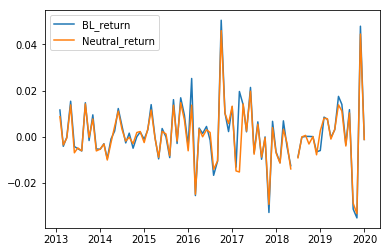

In [72]:
plt.plot(final_df.index, final_df['adj_ret'], label='BL_return')
plt.plot(final_df.index, final_df['neutral_ret'], label='Neutral_return')
plt.legend()

plt.show()

### 報酬比較：Black Litterman vs. Neutral Portfolio

In [73]:
default = np.full((84,), np.nan)
final_df['Outperform'] = default

final_df.head()

,adj_ret,neutral_ret,Outperform
Date,,,
2013-01-31,0.011531,0.008602,NaN
2013-02-28,-0.004238,-0.003619,NaN
2013-03-29,-0.000321,-0.000651,NaN
2013-04-30,0.015346,0.013740,NaN
2013-05-31,-0.004347,-0.007063,NaN


In [74]:
for index, ret in final_df.iterrows():
    #print(final_df.loc[index:index,'Outperform'])
    if ret[0] - ret[1] >= 0:
        final_df.loc[index:index,'Outperform'] = 1
    else:
        final_df.loc[index:index,'Outperform'] = 0        

In [75]:
final_df.fillna(0, inplace=True)
final_df.head()

,adj_ret,neutral_ret,Outperform
Date,,,
2013-01-31,0.011531,0.008602,1.0
2013-02-28,-0.004238,-0.003619,0.0
2013-03-29,-0.000321,-0.000651,1.0
2013-04-30,0.015346,0.013740,1.0
2013-05-31,-0.004347,-0.007063,1.0


In [76]:
from statistics import stdev

bl_std = stdev(final_df['adj_ret'])
ntrl_std = stdev(final_df['neutral_ret'])
bl_mean = final_df['adj_ret'].mean()
ntrl_mean = final_df['neutral_ret'].mean()
bl_sharpe = bl_mean / bl_std
ntrl_sharpe = ntrl_mean / ntrl_std

print('black_std:', round(bl_std,4), 'ntrl_std:', round(ntrl_std,4))
print('black_mean:', round(bl_mean,4), 'ntrl_mean:', round(ntrl_mean,4))
print('black_sharpe:', round(bl_sharpe,4), 'ntrl_sharpe:', round(ntrl_sharpe,4))

black_std: 0.0135 ntrl_std: 0.0123
black_mean: 0.0012 ntrl_mean: 0.0004
black_sharpe: 0.0915 ntrl_sharpe: 0.0292


In [77]:
final_df['Outperform'].sum()

49.0